In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
epl = pd.read_csv("epl.csv")
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,FW,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,FW,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,DF,20,...,7,23,2,1,29,0,0,42,25,18


In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null object
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null object
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non

In [5]:
epl['Position'].value_counts()

MF    575
DF    527
FW    366
Name: Position, dtype: int64

In [6]:
cleanup_position={"Position":{"MF":1,"DF":2,"FW":3}}

In [7]:
epl.replace(cleanup_position,inplace=True)
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,2,20,...,7,23,2,1,29,0,0,42,25,18


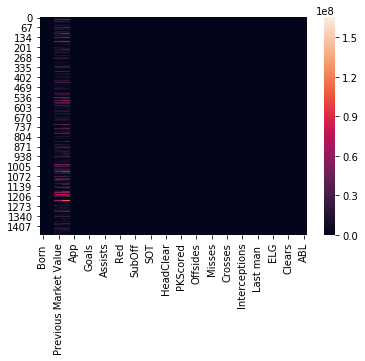

In [8]:
sns.heatmap(epl.drop(['Player', 'Season','Nation','Squad','Position'], axis = 1))

In [9]:
epl['Season'].value_counts()

2015-2016    376
2018-2019    367
2016-2017    366
2017-2018    359
Name: Season, dtype: int64

In [10]:
cleanup_season={"Season":{"2015-2016":1,"2016-2017":2,"2017-2018":3,"2018-2019":4}}

In [11]:
epl.replace(cleanup_season,inplace=True)
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,1,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,3,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,4,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,4,1989,28,West Ham United,England,13200000,9900000,2,20,...,7,23,2,1,29,0,0,42,25,18


Now I am going to break into Defenders, Midfielders, Forwards

In [38]:
epl.sort_values(by='Position', axis=0, inplace=True)
# set the index to be this and don't drop
# get a list of names
names=epl['Position'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
Fwd = epl.loc[epl.Position==3]

In [39]:
Fwd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 905 to 1467
Data columns (total 40 columns):
Player                   366 non-null object
Season                   366 non-null int64
Born                     366 non-null int64
Age                      366 non-null int64
Squad                    366 non-null object
Nation                   366 non-null object
Previous Market Value    366 non-null int64
Market Value             366 non-null int64
Position                 366 non-null int64
App                      366 non-null int64
Minutes                  366 non-null int64
Goals                    366 non-null int64
Passes                   366 non-null int64
Assists                  366 non-null int64
Yellow                   366 non-null int64
Red                      366 non-null int64
SubOn                    366 non-null int64
SubOff                   366 non-null int64
Shots                    366 non-null int64
SOT                      366 non-null int64
HitPost  

In [49]:
def change_in_price(df):
    df_new =(df['Market Value']-df['Previous Market Value'])
    return df_new

In [51]:
def drop_columns(df,columns):
    df = df.drop(columns=columns,axis=1)
    return df

In [78]:
fwd = drop_columns(Fwd,["Born ","Fouls","Last man ","ELG","OwnGoal","Clears","Tackles","ABW","ABL","Interceptions","Blocks",
                        "Red","Yellow","Nation","Squad"])

In [79]:
a = change_in_price(fwd)

In [80]:
fwd = fwd.assign(Change = a)  

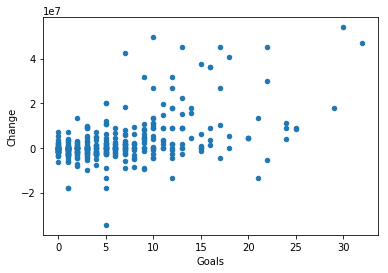

In [81]:
fwd.plot.scatter(x='Goals', y='Change')

In [104]:
fwd.set_index(['Player', 'Season'])

,,Age,Previous Market Value,Market Value,Position,App,Minutes,Goals,Passes,Assists,SubOn,...,HeadClear,HeadGoal,PKScored,FKGoal,Offsides,ThrBall,Misses,Corners,Crosses,Change
Player,Season,,,,,,,,,,,,,,,,,,,,,
Manolo Gabbiadini,2,24,18700000,13500000,3,11,731,4,117,0,1,...,8,0,0,0,10,0,3,0,3,-5200000
Mame Biram Diouf,2,28,7200000,6300000,3,27,1382,1,363,2,12,...,19,0,0,0,10,0,4,0,26,-900000
Manolo Gabbiadini,3,26,13500000,10800000,3,28,1074,5,223,0,17,...,3,0,1,0,10,1,12,0,5,-2700000
Mame Biram Diouf,1,27,10000000,7200000,3,26,1269,5,264,0,14,...,7,5,0,0,8,1,7,0,8,-2800000
M'Baye Niang,2,21,13500000,16500000,3,16,1254,2,405,2,1,...,4,1,0,0,5,2,0,2,37,3000000
Mame Biram Diouf,3,30,6300000,6300000,3,35,2601,6,558,2,5,...,43,1,0,0,23,0,39,0,34,0
Marko Arnautovic,3,28,13500000,22500000,3,31,2322,11,684,6,3,...,19,0,0,0,43,9,38,3,61,9000000
Mauro Zárate,1,28,3300000,2700000,3,15,790,3,263,0,6,...,0,0,0,1,0,0,0,27,61,-600000
Marouane Chamakh,1,31,2200000,1800000,3,10,250,0,93,0,9,...,3,0,0,0,4,0,1,0,1,-400000


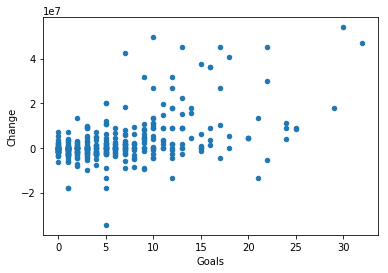

In [105]:
fwd.plot.scatter(x='Goals', y='Change')

In [115]:
def Goal_involvement_per_minute (df):
    df_column = 100*(df["Goals"]+df['Assists'])/df["Minutes"]
    return df_column

In [116]:
GIPM = Goal_involvement_per_minute(fwd)

In [117]:
fwd = fwd.assign(GIPM = GIPM)
fwd.head()

,Player,Season,Age,Previous Market Value,Market Value,Position,App,Minutes,Goals,Passes,...,HeadGoal,PKScored,FKGoal,Offsides,ThrBall,Misses,Corners,Crosses,Change,GIPM
905,Manolo Gabbiadini,2,24,18700000,13500000,3,11,731,4,117,...,0,0,0,10,0,3,0,3,-5200000,0.547196
903,Mame Biram Diouf,2,28,7200000,6300000,3,27,1382,1,363,...,0,0,0,10,0,4,0,26,-900000,0.217077
906,Manolo Gabbiadini,3,26,13500000,10800000,3,28,1074,5,223,...,0,1,0,10,1,12,0,5,-2700000,0.465549
902,Mame Biram Diouf,1,27,10000000,7200000,3,26,1269,5,264,...,5,0,0,8,1,7,0,8,-2800000,0.394011
898,M'Baye Niang,2,21,13500000,16500000,3,16,1254,2,405,...,1,0,0,5,2,0,2,37,3000000,0.318979


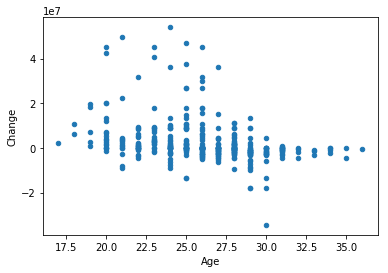

In [119]:
fwd.plot.scatter(x='Age', y='Change')

C:\Users\OGUNKOLA OBAFEMI\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

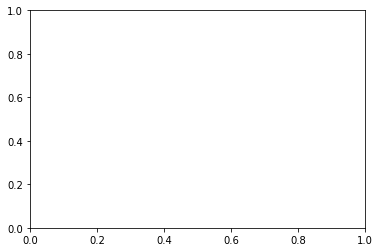

In [124]:
fwd.plot.kde(y='GIPM)